In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
number_of_Water = 50
number_of_normal = 50

total_train = number_of_Water + number_of_normal
mask_water = df['Type 1'] =='Water'
mask_normal= df['Type 1'] =='Normal'

total = df[mask_water | mask_normal]


In [4]:
matrix_mean = [total['HP'].mean(),
               total['Attack'].mean(),
               total['Defense'].mean(),
               total['Sp. Atk'].mean(),
               total['Sp. Def'].mean(),
               total['Speed'].mean()]

In [8]:
HP_matrix =      np.array(total['HP'])
Attack_matrix =  np.array(total['Attack'])
Defense_matrix = np.array(total['Defense'])
SpAtk_matrix =   np.array(total['Sp. Atk'])
SpDef_matrix =   np.array(total['Sp. Def'])
Speed_matrix =   np.array(total['Speed'])

sum = np.zeros([6,6])



total_data = np.vstack((HP_matrix,
                        Attack_matrix,
                        Defense_matrix,
                        SpAtk_matrix,
                        SpDef_matrix,
                        Speed_matrix)).T
i = 0
for x in total_data:
    print("number : ",i, 'matrix = ',x)
    x =  np.array(x).reshape(6,1)
    sum = sum + np.dot(x-matrix_mean,(x-matrix_mean).T)
    i = i+1



sum = sum/210

sum

number :  0 matrix =  [44 48 65 50 64 43]
number :  1 matrix =  [59 63 80 65 80 58]
number :  2 matrix =  [ 79  83 100  85 105  78]
number :  3 matrix =  [ 79 103 120 135 115  78]
number :  4 matrix =  [40 45 40 35 35 56]
number :  5 matrix =  [63 60 55 50 50 71]
number :  6 matrix =  [ 83  80  75  70  70 101]
number :  7 matrix =  [ 83  80  80 135  80 121]
number :  8 matrix =  [30 56 35 25 35 72]
number :  9 matrix =  [55 81 60 50 70 97]
number :  10 matrix =  [40 60 30 31 31 70]
number :  11 matrix =  [ 65  90  65  61  61 100]
number :  12 matrix =  [115  45  20  45  25  20]
number :  13 matrix =  [140  70  45  85  50  45]
number :  14 matrix =  [40 45 35 40 40 90]
number :  15 matrix =  [ 65  70  60  65  65 115]
number :  16 matrix =  [50 52 48 65 50 55]
number :  17 matrix =  [80 82 78 95 80 85]
number :  18 matrix =  [40 50 40 40 40 90]
number :  19 matrix =  [65 65 65 50 50 90]
number :  20 matrix =  [90 95 95 70 90 70]
number :  21 matrix =  [ 40  40  35  50 100  70]
number :  

array([[6293.59882086, 1559.57487528,  774.06058957, 1821.42875283,
        2594.61732426,  111.11092971],
       [1559.57487528, 5279.63664399, 2777.12235828, 2299.11909297,
        1591.85052154, 1917.37269841],
       [ 774.06058957, 2777.12235828, 4380.55092971, 2486.83337868,
        2146.62195011,  829.02984127],
       [1821.42875283, 2299.11909297, 2486.83337868, 4945.68725624,
        2844.93297052, 1339.05514739],
       [2594.61732426, 1591.85052154, 2146.62195011, 2844.93297052,
        4486.63582766,  930.67229025],
       [ 111.11092971, 1917.37269841,  829.02984127, 1339.05514739,
         930.67229025, 4037.59446712]])

In [14]:
w,h = np.linalg.eig(sum)

In [15]:
w

array([14019.11554624,  5799.51059381,  3519.47880828,  3051.57360151,
        1231.70150591,  1802.32388983])

In [29]:
h

array([[-0.29630724, -0.15303101,  0.03524749,  0.3758385 ,  0.39562356,
         0.7679639 ],
       [-0.53874785, -0.34609926,  0.13503936,  0.37166753,  0.45489848,
         0.47608933],
       [-0.58245705, -0.41192367, -0.35937079, -0.3415745 , -0.28698382,
         0.40358698],
       [-0.3347826 , -0.06280436, -0.04647932,  0.35347723,  0.47705222,
         0.72752383],
       [-0.54240052, -0.29278116,  0.20865909,  0.35029122,  0.43938846,
         0.51066241],
       [-0.40075432, -0.28870111, -0.20089698,  0.23027348,  0.55635853,
         0.5942452 ]])

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

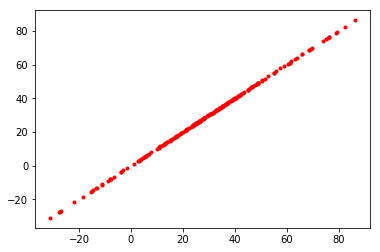

In [53]:
w1 = h[5]
w2 = h[5]
w1 =  np.array(w1).reshape(6,1).T
w2 =  np.array(w2).reshape(6,1).T
w1_plot = []
w2_plot = []

for y in total_data:

    w1_plot.append(np.dot(w1,y))
    w2_plot.append(np.dot(w2,y))
plt.plot(w1_plot,w2_plot,'r.')